### PCA的本质

将数据从一组坐标系，转移到另一组坐标系的过程。

### 求出第一主成分后，如何求出下一个主成分？

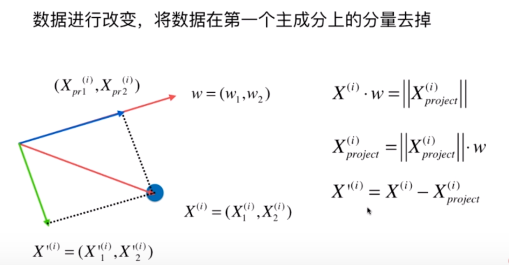
之后，在新的数据上求第一主成分。

### 获得前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2)) # 100个样本，每个样本2个特征
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size = 100)

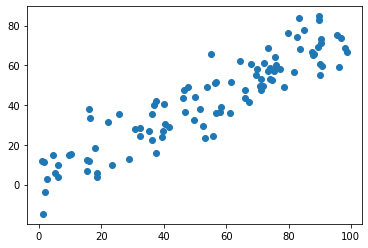

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
# demean
def demean(X):
    return X - np.mean(X, axis = 0)

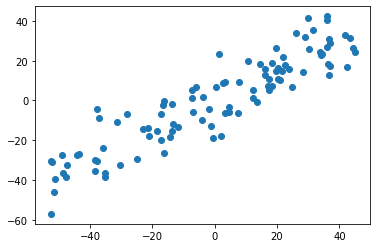

In [5]:
X = demean(X)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [6]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

In [7]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)

In [8]:
w # 求出第一主成分对应的单位方向向量

array([0.79015198, 0.61291096])

In [9]:
# 循环的写法
# X2 = np.empty(X.shape) # 去掉第一主成分分量的结果
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w

In [10]:
# 向量化写法
X2 = X - X.dot(w).reshape(-1, 1) * w  # X - X_project

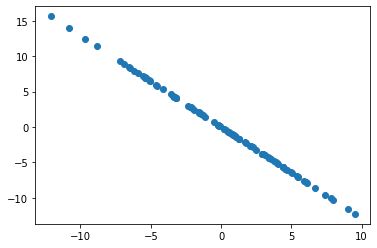

In [11]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()  # 和第一主成分方向向量垂直的向量

In [12]:
w2 = first_component(X2, initial_w, eta) # 求的第二主成分对应的轴
w2

array([-0.61290614,  0.79015572])

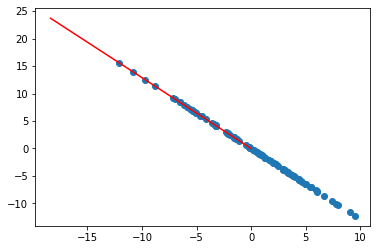

In [13]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.plot([0, w2[0] * 30], [0, w2[1] * 30], color = 'r')
plt.show()

In [14]:
w.dot(w2)  # w和w2相互垂直，向量相乘等于0

6.096036727021303e-06

### 封装——求数据的前n个主成分

In [15]:
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy() # 为了不破坏原来的数据
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [16]:
first_n_components(2, X) # 2维数据，最多有2个主成分

[array([0.79015206, 0.61291086]), array([-0.61290758,  0.79015461])]